<a href="https://colab.research.google.com/github/gencross/CollatzGroup3/blob/main/Collatz_Conjecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Collatz Conjecture
##Group 3
###Edward Hayden, Miles Mitchell, Kevin Nguyen, Tatiana Godinez

# Introduction
The 3n+1 problem is simple enough for an elementary schooler to grasp. Pick a number. If it's even, divide it by 2. If it's odd, multiply it by 3, then add 1. Then, repeat the process. If you reach 1, stop. For example, 5 -> 16 -> 8 -> 4 -> 2 -> 1. The Collatz conjecture states that every positive integer will reach 1 after only finitely many steps. This conjecture has yet to be proven or disproven. In this notebook, we will explore some of the questions and conundrums surrounding this problem.

In [ ]:
import math
import matplotlib.pyplot as plt

# Verifying the Conjecture
Below is a function that verifies the conjecture up to 10 million. We check every odd number from 3 to a 10 million minus 1. We don't check the even numbers for the following reason. Any even number can be written as 2k, where k is any integer. So after the first step of the 3n+1 process, 2k becomes k. If k is odd, we've already checked it, so no need to continue. If k is even, the half of k will either be odd or even, et cetera. Only checking odd numbers speeds up the process significantly. Furthermore, we don't check if a number goes all the way to 1, we only check if it becomes less than where it started. Since we check numbers sequentially, we've already checked all of the numbers less than the one that we're currently checking.

In [ ]:
def collatz_check(n): #check all numbers less than or equal to n
  for i in range(3,n+1,2): #only check odd numbers
    c = i # i will remain constant, c will change
    while c >= i:
      if c % 2 == 0:
        c //= 2
      if c % 2 == 1:
        c = (3 * c + 1) // 2 # we can do two steps at once since 3c+1 is always even
  print("Verified up to {}".format(n))

In [ ]:
collatz_check(10**7)

Verified up to 10000000


# Dropping Time
The "dropping time", σ(n), of an integer n is defined as the number of 3n+1 iterations that n undergoes before it becomes less than where it started. For example, σ(5)=3, since 5 goes to 16 goes to 8 goes to 4, which is less than 5. Every number that we tested has a finite dropping time, since every number that we tested eventually reached 1. The dropping time is significant in testing new numbers if you're testing numbers sequentially. Once a number n drops below where it started, it will definitely reach 1 because all numbers less than n have already been shown to reach 1. Below, you can see the dropping time function that we created.

In [ ]:
def sigma(n):
  '''
  Finds and returns the "dropping time" of n.
  This is the number of 3n+1 loops that it takes
  for n to become less than where it started.
  '''
  i = n # i will be the variable that changes, n will stay static
  loops = 0 # track the dropping time here
  while i >= n: # stop when i < n
    if i % 2 == 0:
      i //= 2
      loops += 1
    else:
      i = (3 * i + 1) // 2
      loops += 2 # We can combine 2 steps into one here since 3i+1 is always even
  return loops

At first glance, σ(n) doesn't depend on the size of n. See below, the dropping time of prime numbers ranging from 1 to 10 digits.

In [ ]:
[sigma(7),
sigma(31),
sigma(127),
sigma(8191),
sigma(97259),
sigma(524287),
sigma(9375739),
sigma(86028121),
sigma(633910099),
sigma(2147483647)]

[11, 91, 24, 70, 8, 91, 21, 3, 6, 187]

The 10 digit number has the largest dropping time, but 31 is tied for second place. So, the following function was created to find which numbers have a bigger dropping time than any previous numbers.

In [ ]:
def best_sigmas(n):
  '''
  Creates and returns a list all positive ints
  less than or equal to n whose dropping time
  is greater than the dropping times of all
  smaller positive ints. Also returns the dropping
  times. Output format is (n,sigma(n)).
  '''
  int_list = [(2,1)] #σ(1) is undefined, so we start checking at 2
  for i in range(3,n+1,2): # we only check odd numbers since σ(2n) = 1 for any n
    sig_i = sigma(i) # save this as a variable so we don't have to run it twice
    if sig_i > int_list[-1][1]:
      int_list.append((i,sig_i))
  return int_list

In [ ]:
best_sigmas(10**7)

[(2, 1),
 (3, 6),
 (7, 11),
 (27, 96),
 (703, 132),
 (10087, 171),
 (35655, 220),
 (270271, 267),
 (362343, 269),
 (381727, 282),
 (626331, 287),
 (1027431, 298),
 (1126015, 365),
 (8088063, 401)]

The output is formatted as `(n,σ(n))`. With this list, we can see that σ(n) only increases 13 times when n goes from 2 to 10 million. A logical next step would be finding what the most common dropping time is. A sensible guess is 1, since all even numbers have a dropping time of 1. Let's check.

In [ ]:
from statistics import mean
from statistics import mode
sigma_list = []
for i in range(2,10**7): # we check up 10**7 because checking higher takes too long
  sigma_list.append(sigma(i))
print(mean(sigma_list), "is the mean.")
print(mode(sigma_list), "is the mode.")

5.235936047187209 is the mean.
1 is the mode.


As predicted, 1 is the mode. But, the mean is 5.236, a number that seems quite random. What happens when we only consider odd numbers?

In [ ]:
from statistics import mean
from statistics import mode
sigma_list = []
for i in range(3,10**7,2): # only odd numbers this time
  sigma_list.append(sigma(i))
print(mean(sigma_list), "is the mean.")
print(mode(sigma_list), "is the mode.")

9.471872094374419 is the mean.
3 is the mode.


When we only look at odd numbers, the mode is 3. The mean is about twice as big, which makes sense. Odd numbers are of the form 2n+1, so what happens if we look at numbers of the form 4n+1?

In [ ]:
from statistics import mean
from statistics import mode
sigma_list = []
for i in range(5,10**7,4): # we start with 4 because σ(1) is undefined
  sigma_list.append(sigma(i))
print(mean(sigma_list), "is the mean.")
print(mode(sigma_list), "is the mode.")

3 is the mean.
3 is the mode.


This time, 3 is the mean as well! What does this list look like?

In [ ]:
print(sigma_list[10**5:10**5+200])

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


It's too big to show here because of the length of the list, but it's all 3s. So, it looks like σ(4n+1) = 3 for all n! In fact, this can be proven.<br />
`4n+1 is odd, so do 3(4n+1)+1`<br />
`12n+4 is even, so do (12n+4)/2`<br />
`6n+2 is even, so do (6n+2)/2`<br />
`3n+1 < 4n+1 so we're done.`<br />
This shows that any number of the form 4n+1 has a dropping time of 3! Are there other formulas that can give us numbers with a fixed dropping time? To answer this question, here is a function which will calculate σ(n) for all n=ai+b, where i is a positive integer. We stop the calculations at n=10**6.

In [ ]:
def sigma_b_mod_a(a,b):
  '''
  Returns a list of all of the sigmas
  for integers congruent to b mod a
  up to 10**6
  '''
  sigma_list = []
  for i in range(b,10**6,a):
    sigma_list.append(sigma(i))
  return sigma_list

We need a way to parse this data. The last function returns a list with too many elements to analyze by hand, so we'll look at its mean instead. The below function will help us. 

In [ ]:
from statistics import mean
def average_sigma(a):
  '''
  Returns a list of tuples. Call the first entry i. Then the
  second entry is the mean of all σ(an+i) where an+i is 
  less than 10**6.
  '''
  average_sigma_list = []
  for i in range(1,301):
    k = mean(sigma_b_mod_a(i,a))
    average_sigma_list.append((i,k))
  return average_sigma_list

In [ ]:
average_sigma(3)[:50]

[(1, 5.226273678821037),
 (2, 9.45253890507781),
 (3, 5.2280362280362285),
 (4, 15.905052),
 (5, 5.223985),
 (6, 9.456047087905825),
 (7, 5.221417221417221),
 (8, 10.428632),
 (9, 5.2475002475002475),
 (10, 9.44797),
 (11, 5.24995324995325),
 (12, 15.91201670386637),
 (13, 5.215709215709215),
 (14, 9.44277534334794),
 (15, 5.217978910105449),
 (16, 6),
 (17, 5.2078233374133),
 (18, 9.494924040607675),
 (19, 5.208922328621371),
 (20, 15.89594),
 (21, 5.208992208992209),
 (22, 9.499813001869981),
 (23, 5.221808229260103),
 (24, 10.436340509275926),
 (25, 5.228625),
 (26, 9.431308824294108),
 (27, 5.272943272943273),
 (28, 15.885370292594148),
 (29, 5.23571035002755),
 (30, 9.435831283374332),
 (31, 5.237181474362949),
 (32, 6),
 (33, 5.276408276408277),
 (34, 9.4156466748266),
 (35, 5.206810863782724),
 (36, 15.98984808121535),
 (37, 5.192844192844193),
 (38, 9.417844657242743),
 (39, 5.209118209118209),
 (40, 10.45516),
 (41, 5.221885121561232),
 (42, 9.417807643847123),
 (43, 5.2363261

It looks like σ(16n+3) = 6! This can be proven in the same way that we proved that σ(4n+1) = 3.<br />
`16n+3 is odd, so do 3(16n+3)+1`<br />
`48n+10 is even, so do (48n+10)/2`<br />
`24n+5 is odd, so do 3(24n+5)+1`<br />
`72n+16 is even, so do (72n+16)/2`<br />
`36n+8 is even, so do (36n+8)/2`<br />
`18n+4 is even, so do (18n+4)/2`<br />
`9n+2 < 16n+3 so we're done.`<br />
Here are all of the numbers that we found with a fixed dropping time:<br />
σ(4n + 1) = 3<br />
σ(16n + 3) = 6<br />
σ(32n + 11) = 8<br />
σ(32n + 23) = 8<br />
σ(128n + 15) = 11<br />
They can all be proven in the same manner as shown for the first two. The calculations are ommitted because they are tedious and uninteresting, but [here is a photo](https://raw.githubusercontent.com/gencross/CollatzGroup3/main/IMG_20210208_135505416.jpg) for those curious. At first, it looked like a pattern might be forming. The first four entries are all of the form 2**k + prime, but then we have 128n + 15, and 15 is composite. After running average_sigma(a) for values of a up to 50, we didn't find any other a and b such that σ(an+b) is fixed. 

To finish off this section, here are some very cool graphs that show how σ(n) changes with respect to n.

In [ ]:
import matplotlib.pyplot as plt
def line_plot(l):
  '''
  make a line plot from the entries of l
  '''
  index = []
  data = []
  for i in l:
    index.append(i[0])
    data.append(i[1])
  plt.plot(index,data)
  plt.xlabel("a")
  plt.ylim(bottom=0)


In the following cells, we fix b, then plot the mean of σ(an+b) for all an+b less than 10**6. This shows how σ can be almost sinusoidal for some choices of b.

(0.0, 16.542927931652553)

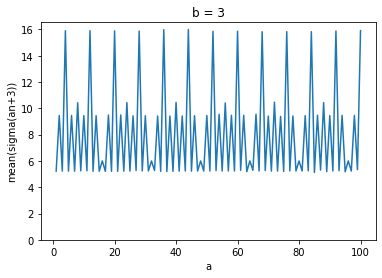

In [ ]:
line_plot(average_sigma(3)[:100])
plt.title("b = 3")
plt.ylabel("mean(sigma(an+3))")

Text(0, 0.5, 'mean(sigma(an+11))')

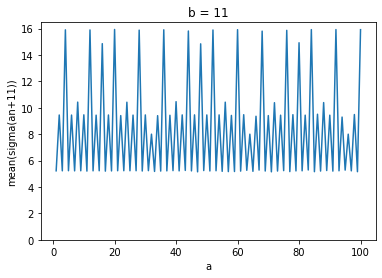

In [ ]:
line_plot(average_sigma(11)[:100])
plt.title("b = 11")
plt.ylabel("mean(sigma(an+11))")

Text(0, 0.5, 'mean(sigma(an+15))')

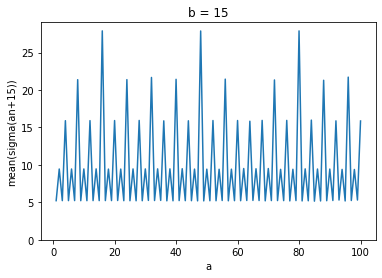

In [ ]:
line_plot(average_sigma(15)[:100])
plt.title("b = 15")
plt.ylabel("mean(sigma(an+15))")

Text(0, 0.5, 'mean(sigma(an+23))')

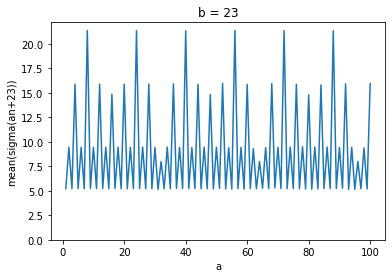

In [ ]:
line_plot(average_sigma(23)[:100])
plt.title("b = 23")
plt.ylabel("mean(sigma(an+23))")

However, not all choices in b result in a graph with such a nice periodicity.

Text(0, 0.5, 'mean(sigma(an+17))')

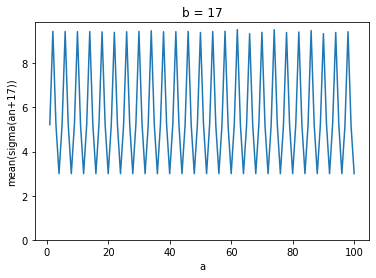

In [ ]:
line_plot(average_sigma(17)[:100])
plt.title("b = 17")
plt.ylabel("mean(sigma(an+17))")

Text(0, 0.5, 'mean(sigma(an+33))')

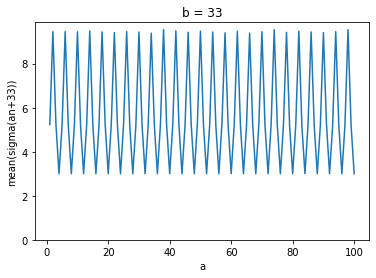

In [ ]:
line_plot(average_sigma(33)[:100])
plt.title("b = 33")
plt.ylabel("mean(sigma(an+33))")

It's important to note that the peaks and valleys are not all the same, they vary slightly.

Finding a pattern that shows that every number must have a finite dropping time is one way that the Collatz conjecture could be proven. But, after some exploration, we were unable to find one.

#Exploring Negative Integers (n)

In the original conjecture, it states if you start with any positive integer n, then the resulting sequence will eventually reach the "cycle" 4,2,1. Every postive number that we've tested has reached 1 i.e the "cycle" mentioned earlier. However what if the starting integer n is a negative number? We might think that it will surely reach a similar "cycle" that would look like -4,-2,-1. However, below is a function which verifies the conjecture and when inputted a negative number in the function the output varied. The negative integers inputted either gave a sequence that reached a "cycle" -4,-2,-1 similar to 4,2,1, (the postive conjecture "cycle") or gave an infinite loop. For example, when inputted -16, we got -16,-8,-4,-2,-1 and for -5 we are given the infinite loop of -5,-14, -7,-20, -10,etc..



In [ ]:
def collatz_verbose(n):
  '''
  Prints the orbit of n
  '''
  while abs(n) != 1: 
    print(n)
    if n % 2 == 0: 
      n //= 2
    else: 
      n = (3 * n + 1)
  return

In [ ]:
collatz_verbose(-6)

-6
-3
-8
-4
-2


In [ ]:
collatz_verbose( -5) # this will go on forever

**Below**: The following was created in order to not run into this infinite loop situation. If the value reached -1 then it broke ('break') the loop and did everything outside that loop (printing the value, the sequence that that integer produced). However, if the negative integer did not reach this "cycle" and produced an infinite loop then it would print the numbers in the loop as well as informing us that it is infinite. The 'enter a number, enter 0 to exist' helps to stop the infinte sequence. 

In [ ]:
n= m
while n != 0: 
  n = int(input("Enter a number, enter 0 to exit:"))
  values = []
     
  if n ==0:
    break 
    
  while abs(n) != 1:
    print(n)
      
    if n in values:
      print('infinite')
      break
    values.append(n)

    if n % 2 == 0:
      n //= 2
    else: 
        n = (3 * n + 1)
    print (values)

print (n)

Enter a number, enter 0 to exit:-6
-6
[-6]
-3
[-6, -3]
-8
[-6, -3, -8]
-4
[-6, -3, -8, -4]
-2
[-6, -3, -8, -4, -2]
Enter a number, enter 0 to exit:-7
-7
[-7]
-20
[-7, -20]
-10
[-7, -20, -10]
-5
[-7, -20, -10, -5]
-14
[-7, -20, -10, -5, -14]
-7
infinite
Enter a number, enter 0 to exit:0
0


**Below:** We were unable to determine which negative number would produce this infinite sequence versus those that would reach -1, that is why below we have a list that demonstrates the negative numbers between -1 to -100. Some have an infinte loop which hold this "cycle" similar to the postive integers of 4,2,1 and in this case it reaches -1.

In [ ]:
inf=[]
for m in range(-1,-100,-1):
    n = m
    printit= True
    values =[]

    if n==0:
      break
    
    while abs(n) !=1:

      if n in values:
        printit = False 
        inf.append(n)
        break
      values.append(n)

      if n % 2 ==0:
        n //= 2
      else:
        n=(3 * n +1)
    if printit:
      print(m,values)
print(inf)

-1 []
-2 [-2]
-3 [-3, -8, -4, -2]
-4 [-4, -2]
-6 [-6, -3, -8, -4, -2]
-8 [-8, -4, -2]
-11 [-11, -32, -16, -8, -4, -2]
-12 [-12, -6, -3, -8, -4, -2]
-15 [-15, -44, -22, -11, -32, -16, -8, -4, -2]
-16 [-16, -8, -4, -2]
-22 [-22, -11, -32, -16, -8, -4, -2]
-24 [-24, -12, -6, -3, -8, -4, -2]
-29 [-29, -86, -43, -128, -64, -32, -16, -8, -4, -2]
-30 [-30, -15, -44, -22, -11, -32, -16, -8, -4, -2]
-32 [-32, -16, -8, -4, -2]
-39 [-39, -116, -58, -29, -86, -43, -128, -64, -32, -16, -8, -4, -2]
-43 [-43, -128, -64, -32, -16, -8, -4, -2]
-44 [-44, -22, -11, -32, -16, -8, -4, -2]
-48 [-48, -24, -12, -6, -3, -8, -4, -2]
-53 [-53, -158, -79, -236, -118, -59, -176, -88, -44, -22, -11, -32, -16, -8, -4, -2]
-57 [-57, -170, -85, -254, -127, -380, -190, -95, -284, -142, -71, -212, -106, -53, -158, -79, -236, -118, -59, -176, -88, -44, -22, -11, -32, -16, -8, -4, -2]
-58 [-58, -29, -86, -43, -128, -64, -32, -16, -8, -4, -2]
-59 [-59, -176, -88, -44, -22, -11, -32, -16, -8, -4, -2]
-60 [-60, -30, -15, -44

We notice that the prime negative numbers and their multiples seem to have this infinte loop compared to even negative numbers who have the "cycle" of -4,-2,-1 excluding 1 and 2.

Starting with a negative integer n doesn't get the same outcome if we were to start with a positive integer n, but it does tell us that some negative numbers reach -1 with a similar "cycle". Even with some similairties we are unable to fully give a proof to further this conjecture. 

## 3n-1

What happens if the conjecture started with a negative integer n and instead of 3n+1 it was 3n-1 to replace odd integer? There will still be negative numbers as outputs without a doubt, but using the information from above we decided to input negative prime numbers and their multiple to see what the outcome will give us. 

In [ ]:
n= m
while n != 0: 
  n = int(input("Enter a number, enter 0 to exit:"))
  values = []
     
  if n ==0:
    break 
    
  while abs(n) != 1:
    print(n)
      
    if n in values:
      print('infinite')
      break
    values.append(n)

    if n % 2 == 0:
      n //= 2
    else: 
        n = (3 * n - 1) #if n is negative, then +1 should be minus -1 otherwise infinite loop
    print (values)

print (n)

Enter a number, enter 0 to exit:-5
-5
[-5]
-16
[-5, -16]
-8
[-5, -16, -8]
-4
[-5, -16, -8, -4]
-2
[-5, -16, -8, -4, -2]
Enter a number, enter 0 to exit:-10
-10
[-10]
-5
[-10, -5]
-16
[-10, -5, -16]
-8
[-10, -5, -16, -8]
-4
[-10, -5, -16, -8, -4]
-2
[-10, -5, -16, -8, -4, -2]
Enter a number, enter 0 to exit:-15
-15
[-15]
-46
[-15, -46]
-23
[-15, -46, -23]
-70
[-15, -46, -23, -70]
-35
[-15, -46, -23, -70, -35]
-106
[-15, -46, -23, -70, -35, -106]
-53
[-15, -46, -23, -70, -35, -106, -53]
-160
[-15, -46, -23, -70, -35, -106, -53, -160]
-80
[-15, -46, -23, -70, -35, -106, -53, -160, -80]
-40
[-15, -46, -23, -70, -35, -106, -53, -160, -80, -40]
-20
[-15, -46, -23, -70, -35, -106, -53, -160, -80, -40, -20]
-10
[-15, -46, -23, -70, -35, -106, -53, -160, -80, -40, -20, -10]
-5
[-15, -46, -23, -70, -35, -106, -53, -160, -80, -40, -20, -10, -5]
-16
[-15, -46, -23, -70, -35, -106, -53, -160, -80, -40, -20, -10, -5, -16]
-8
[-15, -46, -23, -70, -35, -106, -53, -160, -80, -40, -20, -10, -5, -16, -8]

Shown above is the prime number -5 with their multiple of -10 and -20. As we can see these multiples have a differnt output when the odd integer is replaced with 3n-1. Furthermore, there is no infinite loop when prime numbers are inputted on the contrary the "cycle" -4,-2,-1 ( reaching -1) is present.

# Exploring Patterns with Different Expressions



In our Introduction, we mentioned how the Collatz Conjecture states that every positive integer will eventually reach 1 after finitely steps. At this point, we see that the conjecture applies to the expressions $3n + 1$ and $3n - 1$, in which, after a finitely amount of steps, the sequence eventually reaches the "cycle" 4,2,1. But, does the conjecture only apply to the expressions $3n + 1$ and $3n - 1$, or can other expressions written in that form follow the Collatz Conjecture, where they could also reach that "cycle" in a similar fashion?


## 5n + 1 



We first noticed that both expressions are written in slope-intercept form, in which the expression is seen to be in the form of: $$ m \cdot x + b$$ or in this case, we see that the expression is instead in the form of: $$ m \cdot n + b, $$
such that $m$ and $b$ are some integers. 

Suppose we looked at a different expression that still takes a similar form as $ 3n + 1 $. This should help us see if we could detect a pattern that will help us to understand and to generalize the conjecture. With that, instead of $ 3n + 1 $, we explored the expression $ 5n + 1 $ replacing the odd integers when it appears in the cycle. 

In [ ]:
inf=[]
for m in range(1,100,1):
    n = m
    printit= True
    values =[]

    if n==0:
      break
    
    while abs(n) !=1:

      if n in values:
        printit = False 
        inf.append(n)
        break
      values.append(n)

      if n % 2 ==0:
        n //= 2
      else:
        n=(5 * n +1)
    if printit:
      print(m,values)
print(inf)

1 []
2 [2]
3 [3, 16, 8, 4, 2]
4 [4, 2]
6 [6, 3, 16, 8, 4, 2]


KeyboardInterrupt: ignored

In [ ]:
def collatz_5n_1():
  n= m
  while n != 0: 
    n = int(input("Enter a number, enter 0 to exit:"))
    values = []
     
    if n ==0:
      break 
    
    while abs(n) != 1:
      print(n)
      
      if n in values:
        print('infinite')
        break
      values.append(n)

      if n % 2 == 0:
        n //= 2
      else: 
          n = (5 * n + 1) #if n is negative, then +1 should be minus -1 otherwise infinite loop
      print (values)

  print (n)

In [ ]:
collatz_5n_1()

Enter a number, enter 0 to exit:6
6
[6]
3
[6, 3]
16
[6, 3, 16]
8
[6, 3, 16, 8]
4
[6, 3, 16, 8, 4]
2
[6, 3, 16, 8, 4, 2]
Enter a number, enter 0 to exit:30
30
[30]
15
[30, 15]
76
[30, 15, 76]
38
[30, 15, 76, 38]
19
[30, 15, 76, 38, 19]
96
[30, 15, 76, 38, 19, 96]
48
[30, 15, 76, 38, 19, 96, 48]
24
[30, 15, 76, 38, 19, 96, 48, 24]
12
[30, 15, 76, 38, 19, 96, 48, 24, 12]
6
[30, 15, 76, 38, 19, 96, 48, 24, 12, 6]
3
[30, 15, 76, 38, 19, 96, 48, 24, 12, 6, 3]
16
[30, 15, 76, 38, 19, 96, 48, 24, 12, 6, 3, 16]
8
[30, 15, 76, 38, 19, 96, 48, 24, 12, 6, 3, 16, 8]
4
[30, 15, 76, 38, 19, 96, 48, 24, 12, 6, 3, 16, 8, 4]
2
[30, 15, 76, 38, 19, 96, 48, 24, 12, 6, 3, 16, 8, 4, 2]
Enter a number, enter 0 to exit:15
15
[15]
76
[15, 76]
38
[15, 76, 38]
19
[15, 76, 38, 19]
96
[15, 76, 38, 19, 96]
48
[15, 76, 38, 19, 96, 48]
24
[15, 76, 38, 19, 96, 48, 24]
12
[15, 76, 38, 19, 96, 48, 24, 12]
6
[15, 76, 38, 19, 96, 48, 24, 12, 6]
3
[15, 76, 38, 19, 96, 48, 24, 12, 6, 3]
16
[15, 76, 38, 19, 96, 48, 24, 12, 6

Compared to expression $ 3n + 1 $, we noticed a couple of irregularities as well as some similarities. For one, if we start with a particular positive integer n and used $ 5n + 1 $ to replace the odd integers, then we could also achieve a sequence that converges to the "cycle" 4,2,1 As seen above, if we start with a positive integer such as 30, the sequence eventually reaches the "cycle" 4,2,1, but the difference is that the "cycle" includes more than 4,2,1; for $ 5n + 1 $, the "cycle" is now 6,3,16,8,4,2,1. 

With additional integers added into the "cycle," we see that different equations to replace the odd integers can affect what numbers are included in the "cycle," whether it is at the beginning or the end of the "cycle." Thus, can we determine a way to see at what number does the "cycle" begin and end at?

If we were to revisit the original equation $ 3n + 1 $, the "cycle" includes the integers 4,2,1, in which once the sequence reaches 1, then the sequence repeats back to 4. From there, the "cycle" is repeated. This occurs because 1 is an odd number, and when 1 is substituted as n into the expression $ 3n + 1 $: $$ 3(1) + 1 = 4. $$

In a similar way, when we use the expression $ 5n + 1 $ as our odd integer replacement, the "cycle" includes the integers 6,3,16,8,4,2,1, where once the sequence reaches 1, then the sequence repeats back to 6, and thus, the "cycle" for the expression is repeated again. This occurs because 1 is an odd number, and when 1 is subtituted as n into the expression $ 5n + 1 $: $$ 5(1) + 1 = 6. $$

By this point, we noticed a couple of patterns that could help determine the starting and ending integers of the "cycle." With each expression written in the form $ m \cdot n + b $, integer b appears to be the final integer within the "cycle". Therefore, once the sequence reaches integer b, since b is an odd integer, b is substituted as n into the expression and from there, the sequence reaches to $ m \cdot b + b $, which starts the "cycle." What we are hypothesizing is that the starting integer of the "cycle" is $ m \cdot b + b $ while the ending integer of the "cycle" is just b. 

In order to test the validity of this hypothesis, we would need to explore another expression that would fit as a replacement to odd integers. 


## 5n + 3 



Our hypothesis is that to find the starting and ending number of the "cycle" that the sequence reaches, we would set the ending number to equal to b while we would need to perform the following computations to achieve the starting number of the "cycle": $$ m \cdot b + b. $$  

That would mean that with the expression $ 5n + 3  $, the "cycle" should start at 18 and end at 3, in which after 3, the sequence returns back to 18, and from there, the "cycle" repeats.

If our hypothesis is valid, then if we were to use 18 as our integer n, then the cycle should start at 18, end at 3, and should repeat infinitely amount of times.  

In [ ]:
inf=[]
for m in range(1,100,1):
    n = m
    printit= True
    values =[]

    if n==0:
      break
    
    while abs(n) !=1:

      if n in values:
        printit = False 
        inf.append(n)
        break
      values.append(n)

      if n % 2 ==0:
        n //= 2
      else:
        n=(5 * n + 3)
    if printit:
      print(m,values)
print(inf)

1 []
2 [2]
4 [4, 2]


KeyboardInterrupt: ignored

In [ ]:
def collatz_5n_3():
  n= m
  while n != 0: 
    n = int(input("Enter a number, enter 0 to exit:"))
    values = []
     
    if n ==0:
      break 
    
    while abs(n) != 1:
      print(n)
      
      if n in values:
        print('infinite')
        break
      values.append(n)

      if n % 2 == 0:
        n //= 2
      else: 
          n = (5 * n + 3) #if n is negative, then +1 should be minus -1 otherwise infinite loop
      print (values)

  print (n)

In [ ]:
collatz_5n_3()

Enter a number, enter 0 to exit:18
18
[18]
9
[18, 9]
48
[18, 9, 48]
24
[18, 9, 48, 24]
12
[18, 9, 48, 24, 12]
6
[18, 9, 48, 24, 12, 6]
3
[18, 9, 48, 24, 12, 6, 3]
18
infinite
Enter a number, enter 0 to exit:0
0


With the expression $ 5n + 3 $ as our replacement for the odd integers, we could confirm that our hypothesis is valid and could potentially work with other expressions as well. 

# Identifying More Exceptions to Different Expressions

From the previous section, we were able to find a way to compute for the starting and ending numbers of the "cycle" that the sequence converges to. So far based on two expressions, we hypothesized that the pattern we found appears to work, but does this pattern work with all expressions written in the same slope-intercept form such that we could determine the first and last numbers of the "cycle" that the sequence converges to? We find in this section, there exists an additional criteria that needs to be met in order for this pattern to work.   

## 2n + 1



What happens if the conjecture used the expression $ 2n + 1 $ as our replacement to odd integers? By our hypothesis, the starting number should be 3 while the ending number should 1. 

If our hypothesis is valid, then if we were to use 3 as our integer n, then the cycle should start at 3, end at 1, and should repeat infinitely amount of times.

In [ ]:
inf=[]
for m in range(1,100,1):
    n = m
    printit= True
    values =[]

    if n==0:
      break
    
    while abs(n) !=1:

      if n in values:
        printit = False 
        inf.append(n)
        break
      values.append(n)

      if n % 2 ==0:
        n //= 2
      else:
        n=(2 * n + 1)
    if printit:
      print(m,values)
print(inf)

1 []
2 [2]


KeyboardInterrupt: ignored

In [ ]:
def collatz_2n_1():
  n= m
  while n != 0: 
    n = int(input("Enter a number, enter 0 to exit:"))
    values = []
     
    if n ==0:
      break 
    
    while abs(n) != 1:
      print(n)
      
      if n in values:
        print('infinite')
        break
      values.append(n)

      if n % 2 == 0:
        n //= 2
      else: 
          n = (2 * n + 1) #if n is negative, then +1 should be minus -1 otherwise infinite loop
      print (values)

  print (n)

In [ ]:
collatz_2n_1()

Enter a number, enter 0 to exit:3


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[3, 7, 15, 31, 63, 127, 255, 511, 1023, 2047, 4095, 8191, 16383, 32767, 65535, 131071, 262143, 524287, 1048575, 2097151, 4194303, 8388607, 16777215, 33554431, 67108863, 134217727, 268435455, 536870911, 1073741823, 2147483647, 4294967295, 8589934591, 17179869183, 34359738367, 68719476735, 137438953471, 274877906943, 549755813887, 1099511627775, 2199023255551, 4398046511103, 8796093022207, 17592186044415, 35184372088831, 70368744177663, 140737488355327, 281474976710655, 562949953421311, 1125899906842623, 2251799813685247, 4503599627370495, 9007199254740991, 18014398509481983, 36028797018963967, 72057594037927935, 144115188075855871, 288230376151711743, 576460752303423487, 1152921504606846975, 2305843009213693951, 4611686018427387903, 9223372036854775807, 18446744073709551615, 36893488147419103231, 73786976294838206463, 147573952589676412927, 295147905179352825855, 590295810358705651711, 1180591620717411303423, 2361183241434822606847, 4722366482869645213695, 9444732965739290427391, 188894

KeyboardInterrupt: ignored

Instead of achieving the starting and ending number of the "cycle," we instead get a "data rate exceeded" error, which contradicts our hypothesis completely. Compared to the other expressions, $ m $ here happens to be an even number, while before both $ m $ and $ b $ were odd integers. Hence, does that mean that this pattern could only work if both $ m $ and $ b $ are odd numbers? 



## 2n + 3 & 5n + 7



These two expressions to replace the odd integer individually should help determine whether both $m$ and $b$ must be odd in order for the pattern to work. If our hypothesis is valid for all expressions, then for $ 2n + 3 $, the starting number of the "cycle" should be 9 while the ending number should be 3. Also, for $ 5n + 7 $, the starting number of the "cycle" should be 42 while the ending number should be 7.

In [ ]:
inf=[]
for m in range(1,100,1):
    n = m
    printit= True
    values =[]

    if n==0:
      break
    
    while abs(n) !=3:

      if n in values:
        printit = False 
        inf.append(n)
        break
      values.append(n)

      if n % 2 ==0:
        n //= 2
      else:
        n=(2 * n + 3)
    if printit:
      print(m,values)
print(inf)

KeyboardInterrupt: ignored

In [ ]:
def collatz_2n_3():
  n= m
  while n != 0: 
    n = int(input("Enter a number, enter 0 to exit:"))
    values = []
     
    if n ==0:
      break 
    
    while abs(n) != 3:
      print(n)
      
      if n in values:
        print('infinite')
        break
      values.append(n)

      if n % 2 == 0:
        n //= 2
      else: 
          n = (2 * n + 3) 
      print (values)

  print (n)

In [ ]:
collatz_2n_3()

Enter a number, enter 0 to exit:9


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[9, 21, 45, 93, 189, 381, 765, 1533, 3069, 6141, 12285, 24573, 49149, 98301, 196605, 393213, 786429, 1572861, 3145725, 6291453, 12582909, 25165821, 50331645, 100663293, 201326589, 402653181, 805306365, 1610612733, 3221225469, 6442450941, 12884901885, 25769803773, 51539607549, 103079215101, 206158430205, 412316860413, 824633720829, 1649267441661, 3298534883325, 6597069766653, 13194139533309, 26388279066621, 52776558133245, 105553116266493, 211106232532989, 422212465065981, 844424930131965, 1688849860263933, 3377699720527869, 6755399441055741, 13510798882111485, 27021597764222973, 54043195528445949, 108086391056891901, 216172782113783805, 432345564227567613, 864691128455135229, 1729382256910270461, 3458764513820540925, 6917529027641081853, 13835058055282163709, 27670116110564327421, 55340232221128654845, 110680464442257309693, 221360928884514619389, 442721857769029238781, 885443715538058477565, 1770887431076116955133, 3541774862152233910269, 7083549724304467820541, 1416709944860893564108

KeyboardInterrupt: ignored

In [ ]:
inf=[]
for m in range(1,100,1):
    n = m
    printit= True
    values =[]

    if n==0:
      break
    
    while abs(n) !=7:

      if n in values:
        printit = False 
        inf.append(n)
        break
      values.append(n)

      if n % 2 ==0:
        n //= 2
      else:
        n=(5 * n + 7)
    if printit:
      print(m,values)
print(inf)

7 []
14 [14]


KeyboardInterrupt: ignored

In [ ]:
def collatz_5n_7():
  n= m
  while n != 0: 
    n = int(input("Enter a number, enter 0 to exit:"))
    values = []
     
    if n ==0:
      break 
    
    while abs(n) != 7:
      print(n)
      
      if n in values:
        print('infinite')
        break
      values.append(n)

      if n % 2 == 0:
        n //= 2
      else: 
          n = (5 * n + 7) 
      print (values)

  print (n)

In [ ]:
collatz_5n_7()

Enter a number, enter 0 to exit:42
42
[42]
21
[42, 21]
112
[42, 21, 112]
56
[42, 21, 112, 56]
28
[42, 21, 112, 56, 28]
14
[42, 21, 112, 56, 28, 14]
Enter a number, enter 0 to exit:84
84
[84]
42
[84, 42]
21
[84, 42, 21]
112
[84, 42, 21, 112]
56
[84, 42, 21, 112, 56]
28
[84, 42, 21, 112, 56, 28]
14
[84, 42, 21, 112, 56, 28, 14]
Enter a number, enter 0 to exit:0
0


As we could see, the pattern works well with expression $ 5n + 7 $ while with expression $ 2n + 3 $, the sequence does not appear to be converging to any number, but instead seems to be approaching infinity. The reasoning here is that when a number is multipled by an even number and then is added by an odd number, the final result will always be odd. If the output is odd, then that odd integer will be replaced by the epxression, thus the sequence continues to increase until it reaches infinity. Overall, the only time we could use the pattern to find the starting and ending numbers in our "cycle" is if both $m$ and $b$ are odd integers. 

Due to the many exceptions that each expression holds, the additional rule to the pattern proves to be problematic and contributes to the fact that conjecture is difficult to fully comprehend.  As we could see with expressions $ 2n + 1 $ and $ 2n + 3 $, we cannot use the pattern to find the starting and ending integers of the cycle because the pattern only works when both $m$ and $b$ are odd integers. Since each expression holds their own behaviors that may differ from other expressions, the volatility of finding a universal pattern for all of the expressions is extremely difficult to do.   





## Expressions with More Than 1 "Cycle" 

Another example of this volatile behavior is that with $ 5n + 1 $, the sequence could potentially converge to more than 1 cycle, which compared to the expression $ 3n + 1 $, that differs quite a bit. From the previous section, we know that with expression $ 5n + 1 $ as the odd integer replacement, the sequence could reach the "cycle" 6,3,16,8,4,2,1 if we chose integers as our n like: 6, 15, 30. What happens, however, if we chose integers as our n to be: 5,10,26?  

In [ ]:
inf=[]
for m in range(1,100,1):
    n = m
    printit= True
    values =[]

    if n==0:
      break
    
    while abs(n) !=1:

      if n in values:
        printit = False 
        inf.append(n)
        break
      values.append(n)

      if n % 2 ==0:
        n //= 2
      else:
        n=(5 * n + 1)
    if printit:
      print(m,values)
print(inf)

1 []
2 [2]
3 [3, 16, 8, 4, 2]
4 [4, 2]
6 [6, 3, 16, 8, 4, 2]


KeyboardInterrupt: ignored

In [ ]:
def collatz_5n_1_more():
  n= m
  while n != 0: 
    n = int(input("Enter a number, enter 0 to exit:"))
    values = []
     
    if n ==0:
      break 
    
    while abs(n) != 1:
      print(n)
      
      if n in values:
        print('infinite')
        break
      values.append(n)

      if n % 2 == 0:
        n //= 2
      else: 
          n = (5 * n + 1) 
      print (values)

  print (n)

In [ ]:
collatz_5n_1_more()

Enter a number, enter 0 to exit:5
5
[5]
26
[5, 26]
13
[5, 26, 13]
66
[5, 26, 13, 66]
33
[5, 26, 13, 66, 33]
166
[5, 26, 13, 66, 33, 166]
83
[5, 26, 13, 66, 33, 166, 83]
416
[5, 26, 13, 66, 33, 166, 83, 416]
208
[5, 26, 13, 66, 33, 166, 83, 416, 208]
104
[5, 26, 13, 66, 33, 166, 83, 416, 208, 104]
52
[5, 26, 13, 66, 33, 166, 83, 416, 208, 104, 52]
26
infinite
Enter a number, enter 0 to exit:10
10
[10]
5
[10, 5]
26
[10, 5, 26]
13
[10, 5, 26, 13]
66
[10, 5, 26, 13, 66]
33
[10, 5, 26, 13, 66, 33]
166
[10, 5, 26, 13, 66, 33, 166]
83
[10, 5, 26, 13, 66, 33, 166, 83]
416
[10, 5, 26, 13, 66, 33, 166, 83, 416]
208
[10, 5, 26, 13, 66, 33, 166, 83, 416, 208]
104
[10, 5, 26, 13, 66, 33, 166, 83, 416, 208, 104]
52
[10, 5, 26, 13, 66, 33, 166, 83, 416, 208, 104, 52]
26
infinite
Enter a number, enter 0 to exit:26
26
[26]
13
[26, 13]
66
[26, 13, 66]
33
[26, 13, 66, 33]
166
[26, 13, 66, 33, 166]
83
[26, 13, 66, 33, 166, 83]
416
[26, 13, 66, 33, 166, 83, 416]
208
[26, 13, 66, 33, 166, 83, 416, 208]
104


From our script, by using the expression $ 5n + 1 $ as the odd integer replacement, we find there exists another possible "cycle" that the sequence could also reach, which includes the integers: 26, 13, 66, 33, 166, 83, 416, 208, 104, 52. This differs from the expression $ 3n + 1 $ because with $ 3n + 1 $ as the odd integer replacement, we were able to find only one "cycle" that the sequence converges to while with $ 5n + 1 $, the sequence could converge to more than one "cycle;" we cannot say definitely that the expression $ 5n + 1 $ as the odd integer replacement will only have two converging "cycles" until we run all the possible tests for the expression. 

From our observations throughout this exploration, the overall point is that the conjecture is hard to completely understand and to prove because of how volatile the behaviors of the numbers and sequences can be. It appears as though the best way to fully prove the conjecture is through much numerical anaylsis, which is inefficient and inelegant compared to most proofs.  